The power spectral density of the output field is given by:

$$
S_{\text{out}}(\omega) = \kappa\left(|V_1(\omega)|^2 4\pi\frac{\gamma_m\omega}{\omega_m}\left(\coth\left[\frac{\hbar\omega}{2K_B T}\right] - 1\right) + |F_1(\omega)|^2\right)
$$

where,

$$
\begin{align}
V_1(\omega) &= \frac{-iG\omega_m\left(\kappa-i(\tilde{\Delta} + \omega)\right)}{d(\omega)}\\
%
F_1(\omega) &= \frac{\sqrt{2\kappa}\left(-2i G^2\omega_m\right)}{d(\omega)}\\
%
d(\omega) &= 	4  \tilde{\Delta}  |G|^2 \omega_m  +
\left(\tilde{\Delta} ^2+(\kappa -i \omega )^2\right)\left(\omega^2 -\omega_m^2  +i \omega\gamma_m\right)
\end{align}
$$


where, $G = \chi\omega_m\bar{c}_s = g_0\bar{c}_s= \omega_m\tilde{G}\; (\tilde{G}= \chi\bar{c}_s)$. 

We put $\omega= \omega_m$ and normalized all parameters w.r.t. $\omega_m$ as follows:

Simply replace, $\kappa = \omega_m\kappa$, $\tilde{\Delta} = \omega_m\tilde{\Delta}$, $\gamma_m = \omega_m\gamma_m$ and take $\omega_m$ common.

$$
\boxed{d(\omega_m) = 	\omega^4_m\left[4  \tilde{\Delta}  |\tilde{G}|^2  +
\left(\tilde{\Delta} ^2 + (\kappa -i)^2\right)i\gamma_m\right] = \omega^4_m \tilde{d}(\omega_m)}\\
%
V_1(\omega_m) = \frac{-i\tilde{G}\omega^3_m\left(\kappa-i(\tilde{\Delta} + 1)\right)}{d(\omega_m)} = \frac{-i\tilde{G}\left(\kappa-i(\tilde{\Delta} + 1)\right)}{\omega_m\tilde{d}(\omega_m)}\implies \boxed{|V_1(\omega_m)|^2 = \frac{|\tilde{G}|^2\left(\kappa^2 + (\tilde{\Delta} + 1)^2\right)}{\omega^2_m|\tilde{d}(\omega_m)|^2} = \frac{1}{\omega^2_m}|\tilde{V}_1(\omega_m)|^2}\\
%
F_1(\omega_m) = \frac{\sqrt{2\kappa \omega_m}\left(-2i \tilde{G}^2\omega^3_m\right)}{d(\omega)} = \frac{\sqrt{2\kappa}\left(-2i \tilde{G}^2\right)}{\sqrt{\omega_m} \tilde{d}(\omega_m)}\implies \boxed{|F_1(\omega)|^2 = \frac{8\kappa|\tilde{G}|^2}{\omega_m |\tilde{d}(\omega_m)|^2} = \frac{1}{\omega_m}|\tilde{F}_1(\omega)|^2}
%
$$

$$
S_{\text{out}}(\omega_m) = \kappa\left(|V_1(\omega_m)|^2 4\pi\gamma_m\omega^2_m\left(\coth\left[\frac{\hbar\omega_m}{2K_B T}\right] - 1\right) + \omega_m|F_1(\omega_m)|^2\right)\\
%
\implies \boxed{S_{\text{out}}(\omega_m)=\kappa\left(4\pi\gamma_m|\tilde{V}_1(\omega_m)|^2\left(\coth\left[\frac{\hbar\omega_m}{2K_B T}\right] - 1\right) + |\tilde{F}_1(\omega_m)|^2\right)}
$$

The above equation in written in terms of dimensionless, $\kappa$, $\tilde{\Delta}$, and $\gamma_m$. For coding purpose I will write the above equation as:

$$
S_{\text{out}}(\omega_m)=\kappa\left(4\pi\gamma_m A\left(\coth\left[\frac{1}{\tilde{T}}\right] - 1\right) + B\right)
$$

where,

$$
\tilde{T} = \frac{2K_BT}{\hbar\omega_m}, \quad A = \frac{|\tilde{G}|^2\left(\kappa^2 + (\tilde{\Delta} + 1)^2\right)}{|\tilde{d}(\omega_m)|^2}\quad \text{and}\quad  B = \frac{8\kappa|\tilde{G}|^2}{|\tilde{d}(\omega_m)|^2} 
$$
and

$$
\tilde{d}(\omega_m) = 4  \tilde{\Delta}  |\tilde{G}|^2  +
\left(\tilde{\Delta} ^2 + (\kappa -i)^2\right)i\gamma_m
$$

where, $|\tilde{G}|^2 = \chi^2|\bar{c}_s|^2$

Parameters: $\omega_m = 2\pi\times10^7$ Hz, $\kappa = 0.3\omega_m$, $\gamma_m = 10^{-5}\omega_m$, $T = 0.4 K$, $\tilde{T} \approx 230$

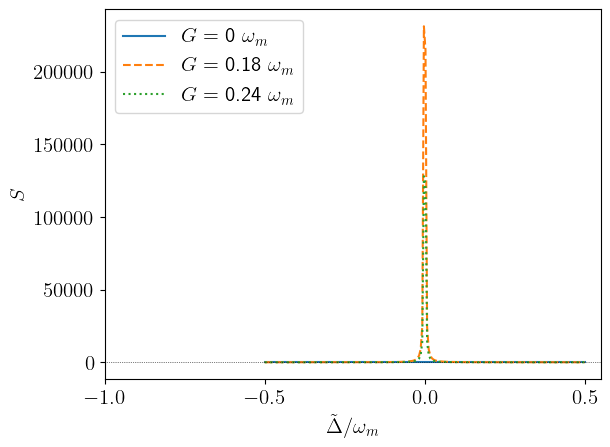

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# enable TeX fonts
plt.rcParams['text.usetex'] = True


# Define the function
def S_out(delta, G):
    G = g_0 
    kappa = 0.3
    gamma_m = 1e-5
    Temp = 230
    iota = complex(0, -1)
    
    d = 4*delta*np.abs(G)**2 + (delta**2 + (kappa - iota)**2)*iota*gamma_m
    
    A = (np.abs(G)**2*(kappa**2 + (delta + 1)**2))/np.abs(d)**2
    
    B = 8*kappa*np.abs(G)**2/np.abs(d)**2
    
    return kappa*(4*np.pi*gamma_m*A*(1/np.tanh(1/Temp) - 1) + B) 

# Define the range for x
x = np.linspace(-0.5, 0.5, 200)

# Define different parameter values
kappa = 0.3
G_s_and_linestyles = [(0,'-'), (0.6*kappa,'--'), (0.8*kappa,':')]  # G and linestyles

# Plot the function for each set of parameters
for G, linestyle in G_s_and_linestyles:
    y = S_out(x, G)
    plt.plot(x, y, label = f'$G=$ {G} $\omega_m$', linestyle=linestyle)

# Plot the zero line
plt.axhline(y=0, color='black', linestyle=':', linewidth=0.5)  # Add zero line
   
# Add labels and legend
plt.xlabel(r'$\tilde{\Delta}/\omega_m$', fontsize = 15)
plt.ylabel(r'$S$', fontsize = 15)
plt.legend(loc="upper left", fontsize = 15)

# axis ticks
plt.xticks(np.arange(-1, 1, 0.5))
#plt.yticks(np.arange(-1, 1.5, 1))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)  

# save the plot to a file
plt.savefig('figure7.png')


plt.show()


## Appendix

$$
E_1(\omega) = \frac{\sqrt{2\kappa}\left(-2i|G|^2\omega_m - \left(\omega^2_m -\omega^2 - i\omega\gamma_m \right)\left(\kappa-i(\tilde{\Delta} + \omega)\right)\right)}{d(\omega)}
$$
can be written in terms of dimensionless parameters as:

$$
E_1(\omega) = \frac{\sqrt{2\kappa}\left(-2i|\tilde{G}|^2 + i\gamma_m\left(\kappa-i(\tilde{\Delta} + 1)\right)\right)}{\sqrt{\omega_m}\tilde{d}(\omega_m)}
%
$$